In [3]:
def function1(input1):
    return input1 + " from first function"

In [8]:
def function2(input2):
    return input2 + " Bagul from second function"

In [5]:
def function3(input3):
    pass

In [6]:
function1("Sunil")

'Sunil from first function'

In [9]:
function2("Sunil")

'Sunil Bagul from second function'

In [11]:
from langgraph.graph import Graph

In [12]:
workflow1 = Graph()

In [13]:
workflow1.add_node("fun1",function1)

In [14]:
workflow1.add_node("fun2",function2)

In [15]:
workflow1.add_edge("fun1","fun2")

In [16]:
workflow1.set_entry_point("fun1")

In [17]:
workflow1.set_finish_point("fun2")

In [18]:
app = workflow1.compile()

In [19]:
app.get_graph()

Graph(nodes={'fun1': Node(id='fun1', name='fun1', data=fun1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun2': Node(id='fun2', name='fun2', data=fun2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='fun1', data=None, conditional=False), Edge(source='fun1', target='fun2', data=None, conditional=False), Edge(source='fun2', target='__end__', data=None, conditional=False)])

In [20]:
from IPython.display import Image,display

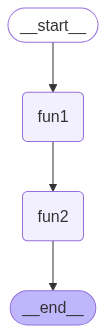

In [21]:
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
app.invoke("HI this is Sunil")

'HI this is Sunil from first function Bagul from second function'

In [24]:
# node wise output from above example
for output in app.stream("hi this is Sunil"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from fun1
_______
hi this is Sunil from first function


here is output from fun2
_______
hi this is Sunil from first function Bagul from second function




In [53]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="o1-mini")

In [48]:
model.invoke("hi").content

'Hello! How can I help you today?'

In [58]:
def llm(input):
    from langchain_openai import ChatOpenAI
    model = ChatOpenAI(model="o1-mini")
    output = model.invoke(input)
    return output.content

In [59]:
def token_counter(input):
    token = input.split()
    token_number = len(token)
    return f"total token number in generated answer is {token_number}"

In [60]:
workflow2 = Graph()

In [61]:
workflow2.add_node("My_LLM",llm)

In [62]:
workflow2.add_node("LLM_Output_Token_Counter",token_counter)

In [63]:
workflow2.add_edge("My_LLM","LLM_Output_Token_Counter")

In [64]:
workflow2.set_entry_point("My_LLM")

In [65]:
workflow2.set_finish_point("LLM_Output_Token_Counter")

In [66]:
app = workflow2.compile()

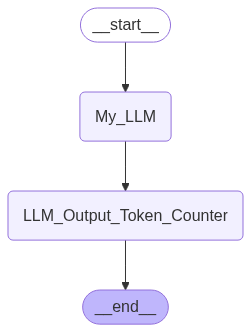

In [67]:
display(Image(app.get_graph().draw_mermaid_png()))

In [68]:
app.invoke("can you tell about capital of india?")

'total token number in generated answer is 673'

In [69]:
for output in app.stream("tell me about the tata enterpirse in very detail."):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from My_LLM
_______
The **Tata Enterprise**, more accurately referred to as the **Tata Group**, is one of India's largest and most prestigious multinational conglomerates. With a rich history spanning over 150 years, the Tata Group has grown from a single trading company into a global powerhouse encompassing diverse industries. Below is an in-depth exploration of the Tata Group, covering its history, key businesses, subsidiaries, leadership, corporate governance, social initiatives, and global impact.

## **1. Overview of Tata Group**

- **Founded:** 1868
- **Founder:** Jamsetji Tata
- **Headquarters:** Mumbai, Maharashtra, India
- **Employees:** Over 750,000 globally (as of 2023)
- **Revenue:** Approximately USD 140 billion (aggregated across all subsidiaries)
- **Presence:** Operates in over 100 countries across six continents

The Tata Group is renowned for its ethical business practices, commitment to sustainability, and significant contributions to India's economic 